# Monte Carlo simulations for TEP2485

### imports 

In [1]:
import scipy.stats as sts #distributions
import numpy as np 
import matplotlib.pyplot as plt #plotting
import random #for bootstrapping

from tqdm.notebook import tqdm #progress bar


#### MC for pi
###### Image to visualize the concept

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

### pick distributions and generate samples

In [2]:
#sample some points in first quadrant from 0-1 for both x and y
n_samples = 1000
X = sts.uniform.rvs(0,1, n_samples)
Y = sts.uniform.rvs(0,1, n_samples)

### check for all points if they are withing the circle 

In [3]:
counter = 0
xy_status = []
x_in = []
y_in = []
x_out = []
y_out = []
for x, y in tqdm(zip(X, Y)):
    if x**2 + y**2 <1:
        counter +=1
        xy_status.append(1)
        x_in.append(x)
        y_in.append(y)
    else:
        xy_status.append(0)
        x_out.append(x)
        y_out.append(y)

0it [00:00, ?it/s]

### visualize the results point by point

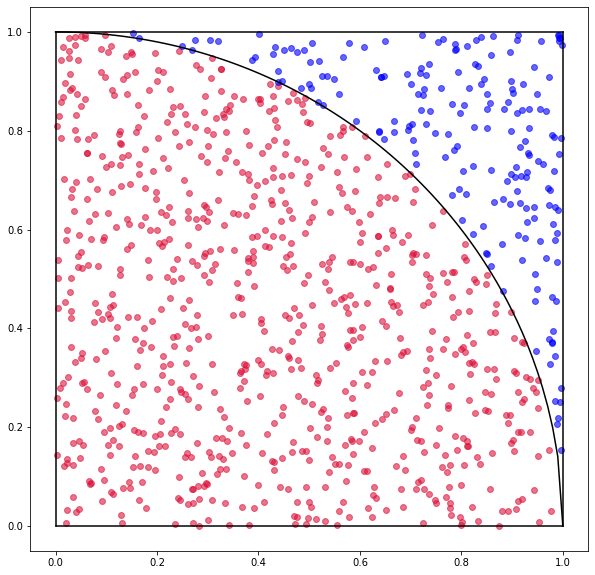

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(x_in, y_in, s = 35,c = 'crimson', alpha = 0.6)
plt.scatter(x_out, y_out, s = 35, c = 'blue', alpha = 0.6)
plt.plot([0,1],[0,0], c = 'k')
plt.plot([0,1], [1,1], c='k')
plt.plot([0,0], [0,1], c= 'k')
plt.plot([1,1], [0,1], c = 'k')
X = np.linspace(0,1, 101)
Y = [(1-x**2)**0.5 for x in X]
plt.plot(X,Y, c = 'k')

### get estimate of pi

In [5]:
print(f'out of a total of {n_samples} points {counter} were in the cirle. => Pi estimate is {counter/n_samples*4} (true pi is {np.pi}).')


out of a total of 1000 points 807 were in the cirle. => Pi estimate is 3.228 (true pi is 3.141592653589793).


### use bootstrapping for confidence intervals on the results

  0%|          | 0/500 [00:00<?, ?it/s]

This MC suggests that pi is 3.2334400000000003 plusminus 0.4374506801914931 (99% conf interval: 2.7959893198085073 - 3.6708906801914933).


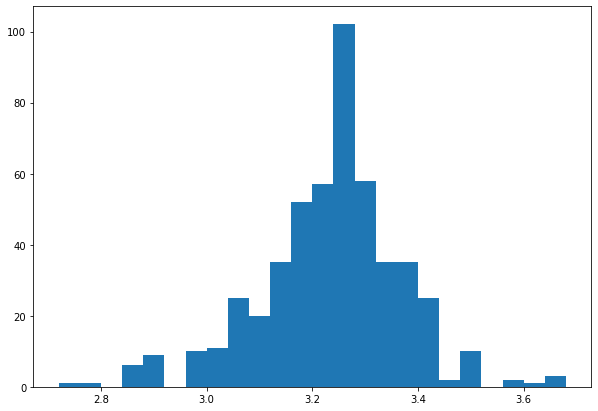

In [6]:
pi_estimates = []
BS_size = int(n_samples/10)
n_BS = 500
for _ in tqdm(range(n_BS)):
    this_list = random.sample(xy_status,BS_size)
    hits = sum(this_list)
    pi_estimates.append(hits/BS_size*4)

plt.figure(figsize=(10,7))
plt.hist(pi_estimates, bins = 'auto')
pi_mean = np.mean(pi_estimates)
pi_std = np.std(pi_estimates)
print(f'This MC suggests that pi is {pi_mean} plusminus {3*pi_std} (99% conf interval: {pi_mean - 3*pi_std} - {pi_mean + 3*pi_std}).')


###### all in one:

# generate example system and do MC for mass balanced flow

#### generate one in and one outflow:

In [7]:
n = 100000
A01 = sts.norm.rvs(100,10,n)
A10a = sts.truncnorm.rvs(a = (0-60)/20,b= 1000,loc=60, scale=5,size=n)

### plot distributions:

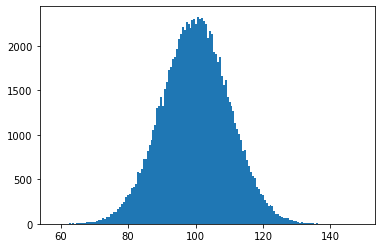

In [8]:
n, bins, patches = plt.hist(A01, bins = 'auto')

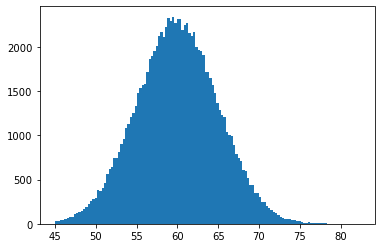

In [9]:
n, bins, patches = plt.hist(A10a, bins = 'auto')

#### MC for the resulting flow and plot

0it [00:00, ?it/s]

A01 is 90.0, A10a is 56.0 and therefore A10b is 34.0.
A01 is 79.0, A10a is 60.0 and therefore A10b is 19.0.
A01 is 110.0, A10a is 58.0 and therefore A10b is 52.0.
A01 is 96.0, A10a is 62.0 and therefore A10b is 34.0.
A01 is 104.0, A10a is 54.0 and therefore A10b is 50.0.
A01 is 112.0, A10a is 64.0 and therefore A10b is 48.0.
A01 is 110.0, A10a is 69.0 and therefore A10b is 41.0.
A01 is 116.0, A10a is 55.0 and therefore A10b is 61.0.
A01 is 102.0, A10a is 52.0 and therefore A10b is 50.0.
A01 is 96.0, A10a is 56.0 and therefore A10b is 40.0.
A01 is 107.0, A10a is 61.0 and therefore A10b is 46.0.
A01 is 93.0, A10a is 59.0 and therefore A10b is 34.0.
A01 is 110.0, A10a is 56.0 and therefore A10b is 54.0.
A01 is 111.0, A10a is 66.0 and therefore A10b is 45.0.
A01 is 117.0, A10a is 64.0 and therefore A10b is 53.0.
A01 is 87.0, A10a is 59.0 and therefore A10b is 28.0.
A01 is 99.0, A10a is 69.0 and therefore A10b is 30.0.
A01 is 96.0, A10a is 48.0 and therefore A10b is 48.0.
A01 is 96.0, A10a 

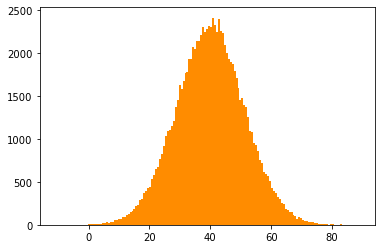

In [33]:


A10b = []

for i, (a01, a10a) in tqdm(enumerate(zip(A01,A10a))):
    if i<20:
        print(f'A01 is {np.round(a01)}, A10a is {np.round(a10a)} and therefore A10b is {np.round(a01)-np.round(a10a)}.')
    A10b.append(a01-a10a)

plt.figure()
n, bins, patches = plt.hist(A10b, color = 'darkorange', bins = 'auto')


#### plot first seven entries of result vector (for animations on slide)

(0.0, 90.0)

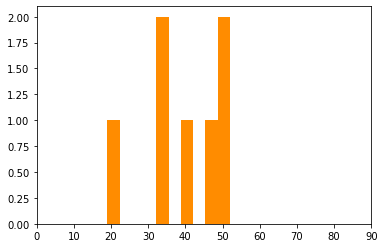

In [11]:
n, bins, patches = plt.hist(np.round(A10b[0:7]), color = 'darkorange')
plt.xlim(0,90)

##### plot resulting histogram with mean and std

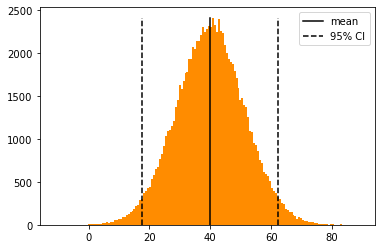

In [40]:
mean = np.mean(A10b)
std = np.std(A10b)

n, bins, patches = plt.hist(A10b, color = 'darkorange', bins = 'auto')
Y = [0, max(n)]
plt.plot([mean, mean], Y, c = 'k', label = 'mean')
plt.plot([mean-2*std, mean-2*std], Y,'--', c = 'k', label = '95% CI')
plt.plot([mean+2*std, mean+2*std], Y,'--', c = 'k')
plt.legend()

In [35]:
n

array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 6.000e+00,
       5.000e+00, 1.000e+01, 8.000e+00, 1.100e+01, 1.300e+01, 1.500e+01,
       2.000e+01, 2.400e+01, 2.700e+01, 2.500e+01, 3.400e+01, 2.900e+01,
       5.100e+01, 5.200e+01, 6.400e+01, 6.400e+01, 9.500e+01, 9.200e+01,
       1.190e+02, 1.300e+02, 1.520e+02, 1.610e+02, 1.830e+02, 2.160e+02,
       2.320e+02, 2.890e+02, 3.000e+02, 3.690e+02, 3.940e+02, 4.340e+02,
       4.430e+02, 5.310e+02, 5.790e+02, 6.460e+02, 6.790e+02, 7.650e+02,
       8.290e+02, 9.170e+02, 1.036e+03, 1.088e+03, 1.103e+03, 1.149e+03,
       1.207e+03, 1.375e+03, 1.453e+03, 1.629e+03, 1.579e+03, 1.676e+03,
       1.764e+03, 1.786e+03, 1.936e+03, 1.931e+03, 2.078e+03, 2.047e+03,
       2.148e+03, 2.142e+03, 2.213e+03, 2.307e+03, 2.244e+03, 2.285e+03,
       2.322e+03, 2.303e+03, 2.414e+03, 2.327e+03, 

## Distribution examples
just plotting the pdf of some distributions


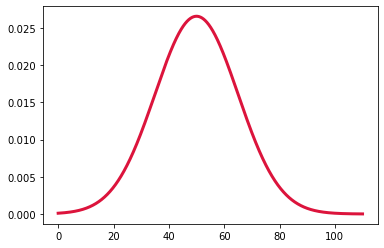

In [12]:
x = np.linspace(0,110, 10001)
plt.plot(x,sts.norm.pdf(x,loc = 50, scale=15), color = 'crimson', lw = 3)

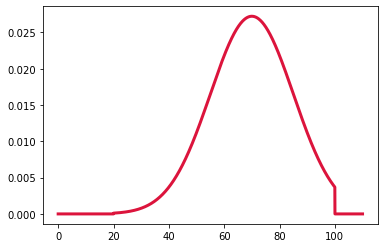

In [13]:
plt.plot(x,sts.truncnorm.pdf(x,a = (0-50)/15,b= (100-70)/15,loc=70, scale=15), color = 'crimson', lw = 3)

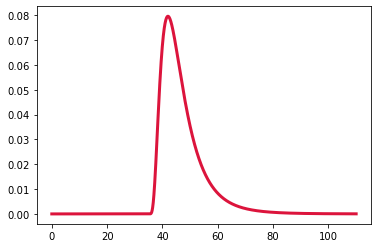

In [14]:
plt.plot(x,sts.lognorm.pdf(x, 0.6, loc=35, scale=10), color = 'crimson', lw = 3)

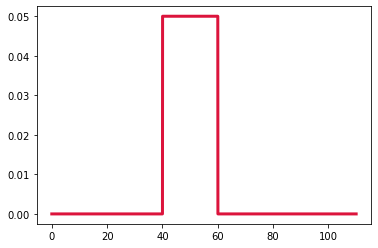

In [15]:
plt.plot(x,sts.uniform.pdf(x, 40, 20), color = 'crimson', lw = 3)

### sampling example (scatter plot)

#### 2D

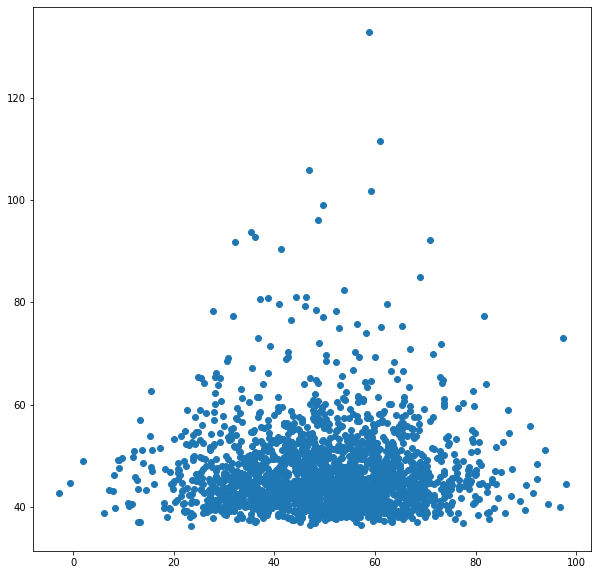

In [18]:
#plt.scatter(sts.lognorm.rvs( 0.6, loc=35, scale=10, size = 2000),sts.norm.rvs(loc = 50, scale=15, size = 2000), s = 15, color = 'tomato', alpha = 0.8)
X = sts.norm.rvs(loc = 50, scale=15, size = 2000)
Y = sts.lognorm.rvs( 0.6, loc=35, scale=10, size = 2000)
plt.figure(figsize=(10,10))
plt.scatter(X, Y)

##### 3D version

Text(0.5, 0, 'Z - lognormal distribution (start 35, mode 42)')

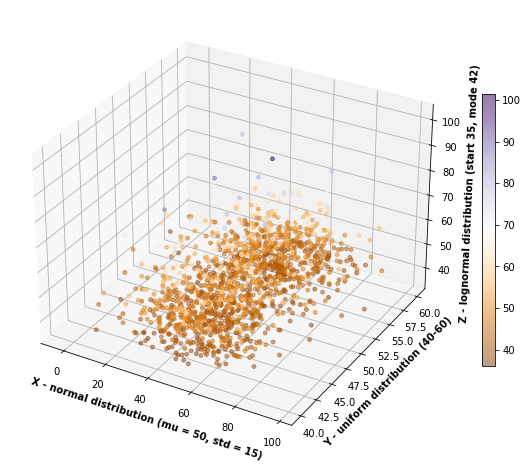

In [27]:
n_points = 1500
X = sts.norm.rvs(loc = 50, scale=15, size = n_points)
Z = sts.lognorm.rvs( 0.6, loc=35, scale=10, size = n_points)
Y = sts.uniform.rvs(40, 20, size = n_points)
plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
scatter_plot = ax.scatter3D(X,Y,Z, c = Z, cmap = plt.get_cmap('PuOr'), s = 15, alpha = 0.5)
plt.colorbar(scatter_plot, shrink = 0.5)
ax.set_xlabel('X - normal distribution (mu = 50, std = 15)', fontweight ='bold')
ax.set_ylabel('Y - uniform distribution (40-60)', fontweight ='bold')
ax.set_zlabel('Z - lognormal distribution (start 35, mode 42)', fontweight = 'bold')


In [149]:
random.__version__

AttributeError: module 'random' has no attribute '__version__'